# Face Recognition Model Construction

## Importing Libraries

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.utils import np_utils
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Reading fer2013 dataset using pandas.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')

In [ ]:
# Lets look at the top 3 rows
df.head(3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training


Creating empty lists.

In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels= []
val_images = []
val_labels = []

Splitting data in train, test and validation sets.

In [ ]:
for i, row in df.iterrows():
  pixels = row['pixels'].split(" ")
  if(row.Usage == "Training"):
    train_images.append(np.array(pixels, 'float32'))
    train_labels.append(row.emotion)
  if(row.Usage == "PublicTest"):
    test_images.append(np.array(pixels, 'float32'))
    test_labels.append(row.emotion)
  if(row.Usage == "PrivateTest"):
    val_images.append(np.array(pixels, 'float32'))
    val_labels.append(row.emotion)

Lets look at no of instances in each set.

In [ ]:
print(len(train_images))

28709


In [ ]:
print(len(test_images))

3589


In [ ]:
print(len(val_images))

3589


In [ ]:
type(train_images)

list

We need to convert the lists to numpy array float32 type.

In [ ]:
train_images = np.array(train_images, 'float32')
train_labels = np.array(train_labels, 'float32')
test_images = np.array(test_images, 'float32')
test_labels = np.array(test_labels, 'float32')
val_images = np.array(val_images, 'float32')
val_labels = np.array(val_labels, 'float32')

In [ ]:
type(train_images)

numpy.ndarray

Emotion labels

In [ ]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
train_labels = np_utils.to_categorical(train_labels, num_classes=7)
test_labels = np_utils.to_categorical(test_labels, num_classes=7)
val_labels = np_utils.to_categorical(val_labels, num_classes=7)

In [ ]:
train_images[0].shape

(2304,)

Scalling and reshaping all three sets.

In [ ]:
train_images = train_images/255
test_images = test_images/255
val_images = val_images/255
train_images = train_images.reshape((28709, 48 , 48, 1))
test_images = test_images.reshape((3589, 48 , 48, 1))
val_images = val_images.reshape((3589, 48 , 48, 1))

In [ ]:
train_images.shape[1:]

(48, 48, 1)

Creating CNN Model

In [ ]:
model = Sequential()

# Layer 1
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3))

# Layer 2
model.add(Conv2D(128, kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3))

# Layer 3
model.add(Conv2D(256, kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.3))

#
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))




# Output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(lr=0.0001, decay=1e-6),
              metrics = ['accuracy'])

In [ ]:
#Training the model
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=60,
                    verbose=1,
                    validation_data=(val_images, val_labels),
                    shuffle=True)

Epoch 1/60
449/449 [==============================] - 26s 59ms/step - loss: 2.0145 - accuracy: 0.2277 - val_loss: 1.9079 - val_accuracy: 0.2449
Epoch 2/60
449/449 [==============================] - 26s 58ms/step - loss: 1.7619 - accuracy: 0.2920 - val_loss: 1.7342 - val_accuracy: 0.3160
Epoch 3/60
449/449 [==============================] - 26s 58ms/step - loss: 1.6426 - accuracy: 0.3494 - val_loss: 1.5970 - val_accuracy: 0.3848
Epoch 4/60
449/449 [==============================] - 26s 58ms/step - loss: 1.5616 - accuracy: 0.3921 - val_loss: 1.6658 - val_accuracy: 0.3920
Epoch 5/60
449/449 [==============================] - 26s 58ms/step - loss: 1.5026 - accuracy: 0.4142 - val_loss: 1.4033 - val_accuracy: 0.4609
Epoch 6/60
449/449 [==============================] - 26s 58ms/step - loss: 1.4528 - accuracy: 0.4361 - val_loss: 1.4068 - val_accuracy: 0.4620
Epoch 7/60
449/449 [==============================] - 26s 58ms/step - loss: 1.4056 - accuracy: 0.4569 - val_loss: 1.3088 - val_accuracy:

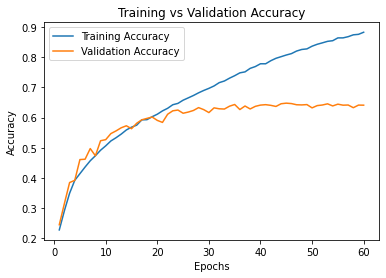

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

113/113 [==============================] - 1s 12ms/step - loss: 1.4223 - accuracy: 0.6297


In [ ]:
pred = model.predict(test_images)

In [ ]:
np.argmax(test_labels, axis=1)

array([0, 1, 4, ..., 4, 4, 4])

In [ ]:
from sklearn import metrics
report = metrics.classification_report(np.argmax(test_labels,axis=1), np.argmax(pred,axis=1), target_names=emotions)
print(report)  

              precision    recall  f1-score   support

       Angry       0.51      0.56      0.53       467
     Disgust       0.76      0.52      0.62        56
        Fear       0.49      0.42      0.45       496
       Happy       0.83      0.84      0.83       895
         Sad       0.50      0.54      0.52       653
    Surprise       0.77      0.80      0.79       415
     Neutral       0.57      0.54      0.55       607

    accuracy                           0.63      3589
   macro avg       0.63      0.60      0.61      3589
weighted avg       0.63      0.63      0.63      3589



In [ ]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")